# **Project Title: Mercedes Car Price Prediction**
# **Project Members:**
 # **1) Jinsar Ahmed (20SW116) G.L**
 # **2) Abdul Rafay  (20SW064)**
 # **3) M.Taha       (20SW102)**

# **Models used:**
# 1) Linear Regression
# 2) Polynomial Regression
# 3) SVR
# 4) Decision Tree Regression
# 5) Random Forest

## Introduction
In this project we are going to analyse, visualize and predict using Mercedes data set and using some methods like linear regression, polynominal regression etc.


### Importing Necessary Libraries
### Data Preparartion, Load and Check Data
### Variable Description
### Data Analysis and Visualization
### Removing Outliers
### Machine Learning (Regression)
    * Linear Regression
    * Polynomial Regression
    * Support Vector Regression (SVR)
    * Decision Tree
    * Random Forest
### Model Selection
### Conclusion



# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.metrics import r2_score

# merging datasets
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/ford.csv
/content/skoda.csv
/content/toyota.csv
/content/focus.csv
/content/cclass.csv
/content/bmw.csv
/content/unclean cclass.csv
/content/audi.csv
/content/merc.csv
/content/hyundi.csv
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2023.10.05/19.32.16.008139.log
/content/.config/logs/2023.10.05/19.32.59.577697.log
/content/.config/logs/2023.10.05/19.31.42.136492.log
/content/.config/logs/2023.10.05/19.32.58.628417.log
/content/.config/logs/2023.10.05/19.32.44.892388.log
/content/.config/logs/2023.10.05/19.32.29.466527.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_ho

<a id = '1'></a><br>
# Data Preparation
## Load and Check Data

In [ ]:
data = pd.read_csv('/content/merc.csv')

In [ ]:
data.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
6,GLE Class,2018,30948,Automatic,16000,Diesel,145,47.9,2.1


In [ ]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


# **Cleaning**

In [ ]:
# check for null values
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# check for duplicate
data.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 12072    False
11912    False
11794    False
11808    False
11860    False
         ...  
5479     False
634      False
10542    False
986      False
7437     False
Length: 13119, dtype: bool>

In [ ]:
# Check for unique values.
data.nunique()

model             27
year              25
price           4424
transmission       4
mileage         9716
fuelType           4
tax               40
mpg              120
engineSize        26
dtype: int64

In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
data.corr() #corrolation between columns

<ipython-input-10-5de932266b61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #corrolation between columns


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


As there are no any duplicated and null values we can move forward to the next step

<a id = '2'></a><br>
## Variable Description

In [ ]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


* model : Model of car
* year : The year that car made
* price : Price (Sterlin)
* Transmission : Type of gear
* milage : How many miles the car went (1 mil = 1,609344 km)
* fuelType : Fuel type
* tax : tax
* mpg : Miles per gallon (1 galon = 3,78541178 liters)
* engine size : Size of engine (liters)

Price will be our target column becouse we want to predict that and the other columns will be our tools that predict the price. However will we use all columns ?

<a id = '3'></a><br>
# Correlation Map


<ipython-input-12-f467ba7c3bbf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


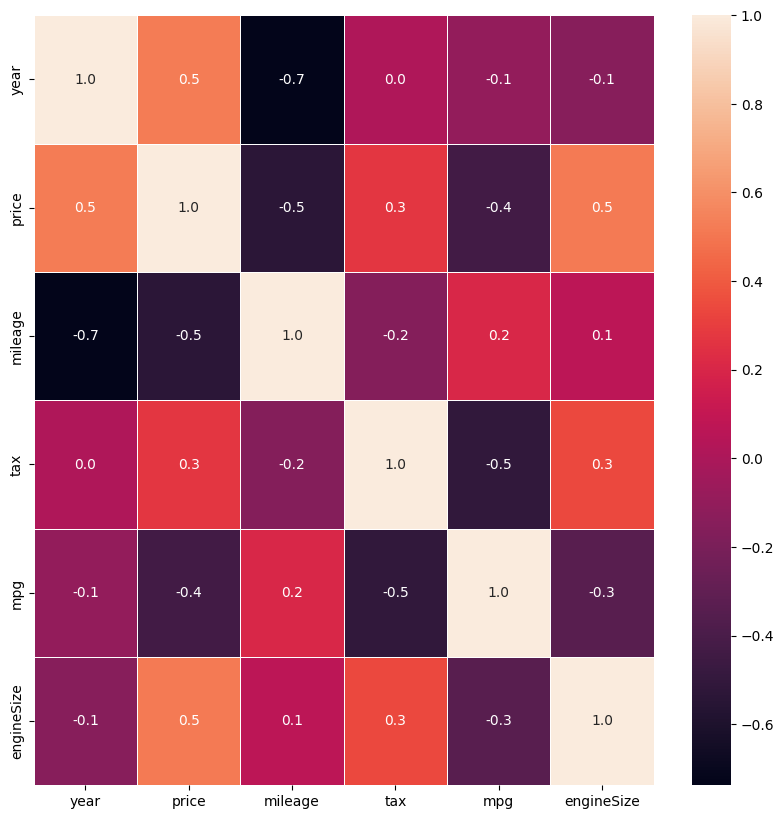

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Here is corrolation map. If the value near to -1 that means there is negative corrolation between values. For example : milage and year. Naturally, the milage is increases as the car is driven. Similarly if the value near to 1 that means there is positive corrolation between values.

In [ ]:
data.corr()["price"].sort_values()


<ipython-input-39-7453993b4955>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

## Data Analysis and Visualization

Price is our target value

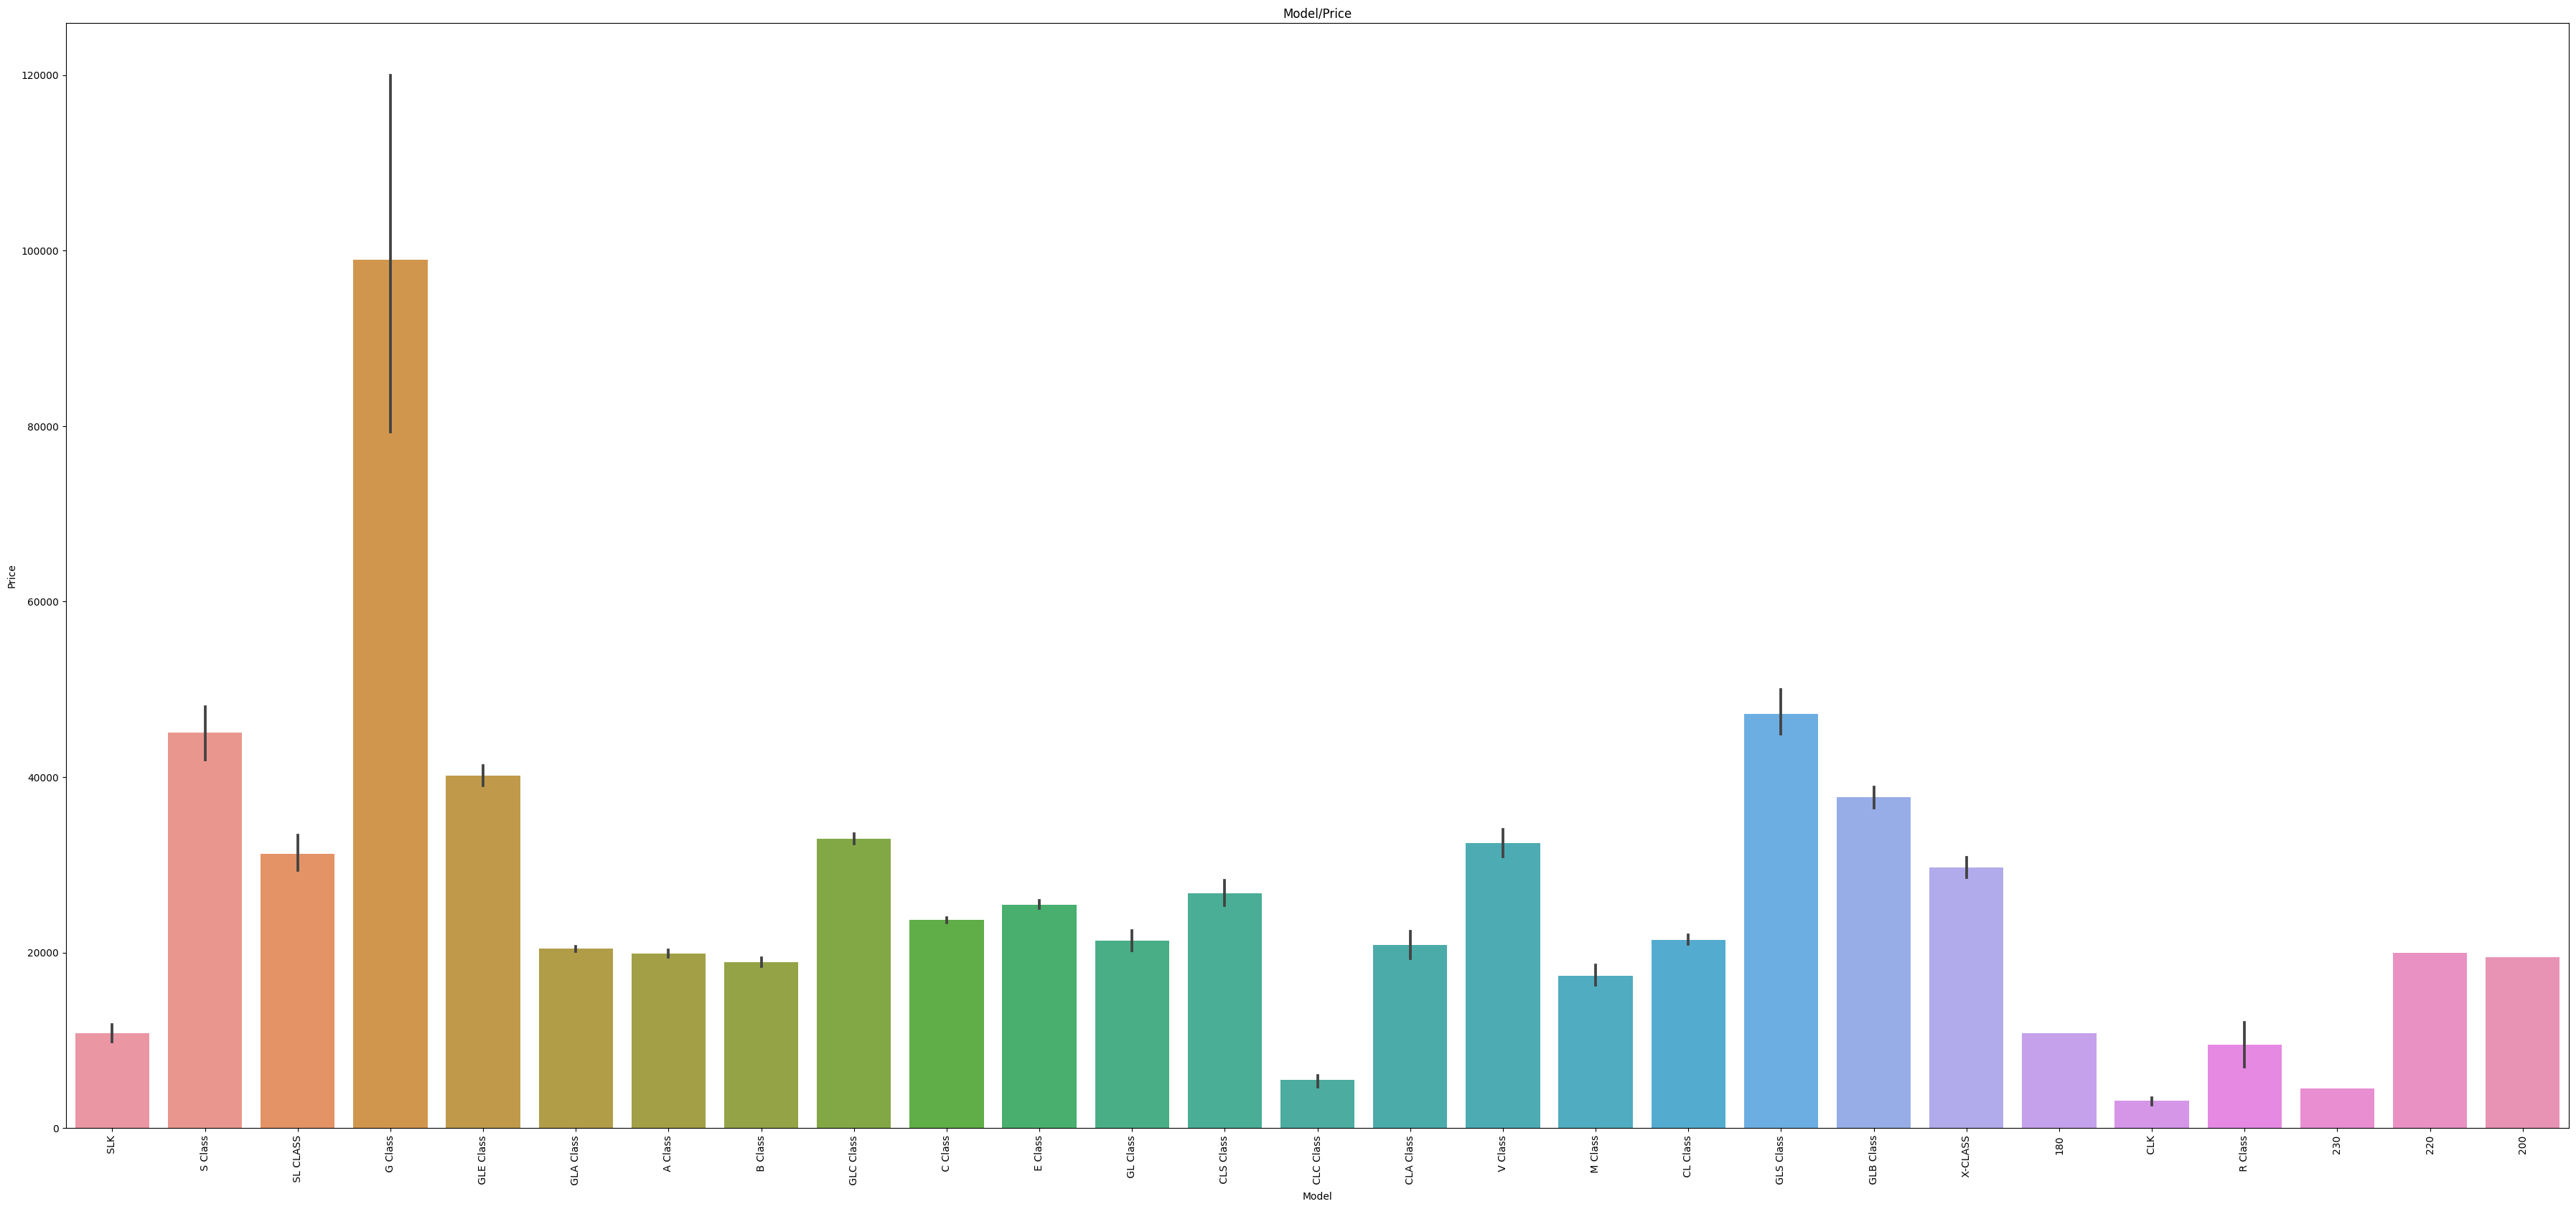

In [ ]:
data_model = data.model
data_price = data.price
#Visiualization
plt.figure(figsize=(45,20))
sns.barplot(x = data_model, y = data_price)
plt.xticks(rotation = 90) # rotation of countries's names
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model/Price')
plt.show()

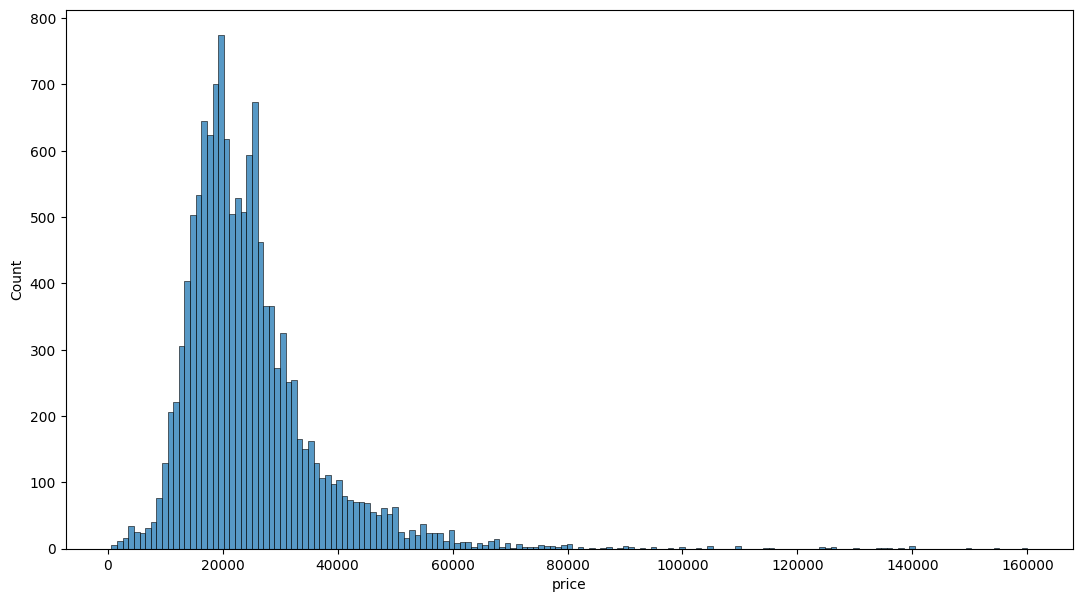

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data["price"])
plt.show()

As you see, after 75.000 there are unnecessary number of values considered. They would destroy our predictions.

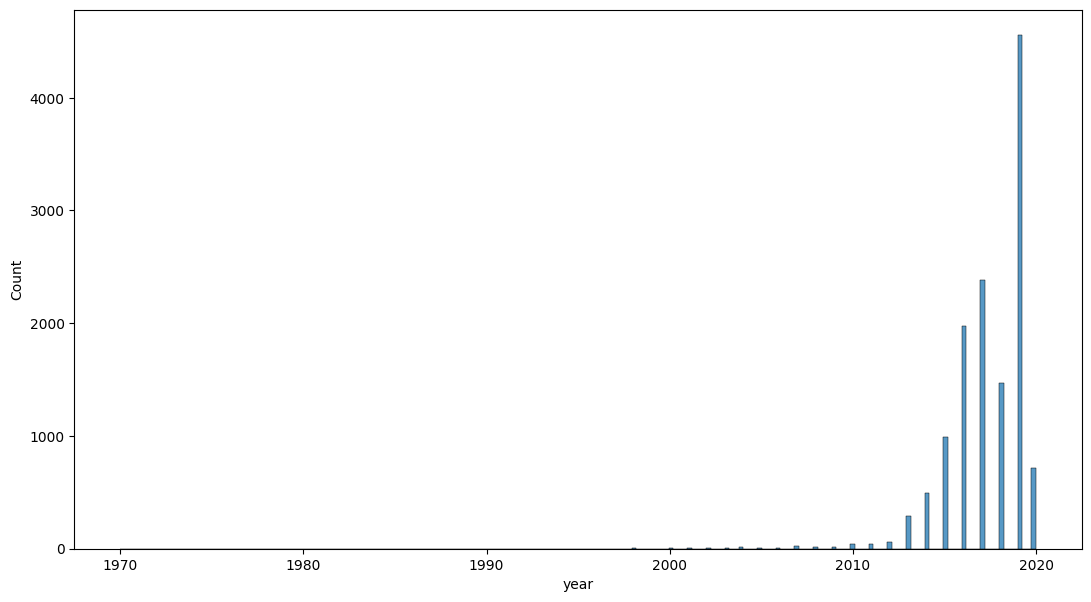

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data.year)
plt.show()

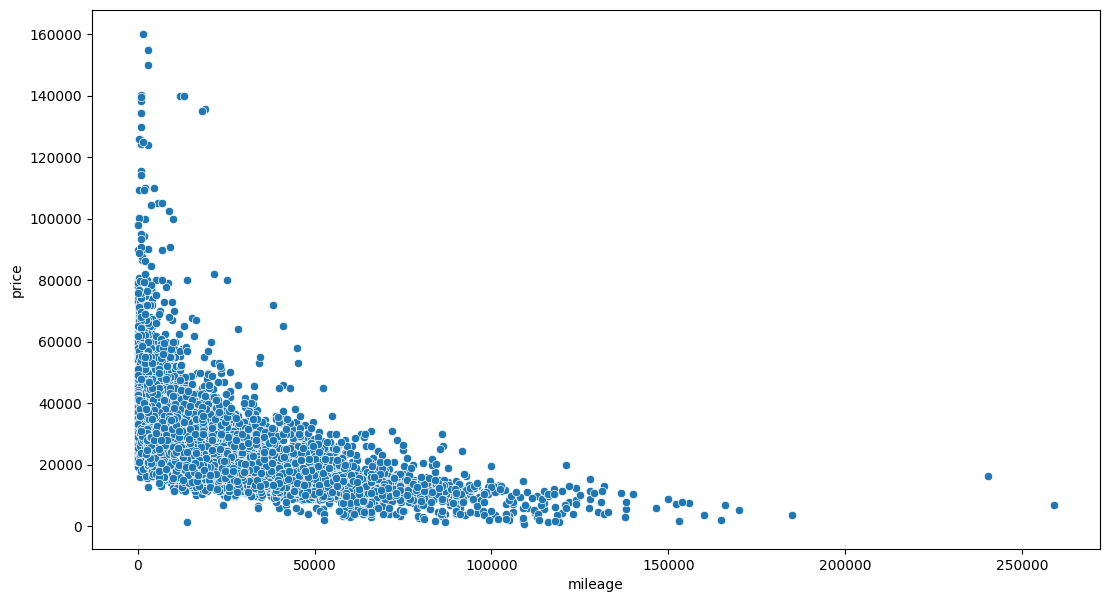

In [ ]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=data.mileage, y=data.price, data=data)
plt.show()

In [ ]:
data.sort_values('price', ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,A Class,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,G Class,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [ ]:
data.sort_values('price', ascending=True).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
12710,C Class,2006,1695,Automatic,153000,Petrol,300,33.6,1.8
11174,S Class,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
12766,C Class,2004,1780,Automatic,118000,Diesel,265,41.5,2.2
12009,A Class,2007,1800,Automatic,84000,Petrol,200,42.8,1.5
11764,SLK,1998,1990,Automatic,99300,Petrol,265,32.1,2.3


In [ ]:
len(data)

13119

In [ ]:
len(data) * 0.01

131.19

# Removing Outliers
We remove 1 percent of the data set (the part that is most likely the outlier that distorts the data) and we get a 99 percent data set.



* nnpDf = ninety nine percent data frame

In [ ]:
nnpDf = data.sort_values("price",ascending = False).iloc[131:]
nnpDf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,GLS Class,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,C Class,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,C Class,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,C Class,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,S Class,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0
...,...,...,...,...,...,...,...,...,...
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [ ]:
nnpDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


# As you see, after discarding 10% dataset there are not massive changes and it disturbuted more balanced. So we are goos to go.

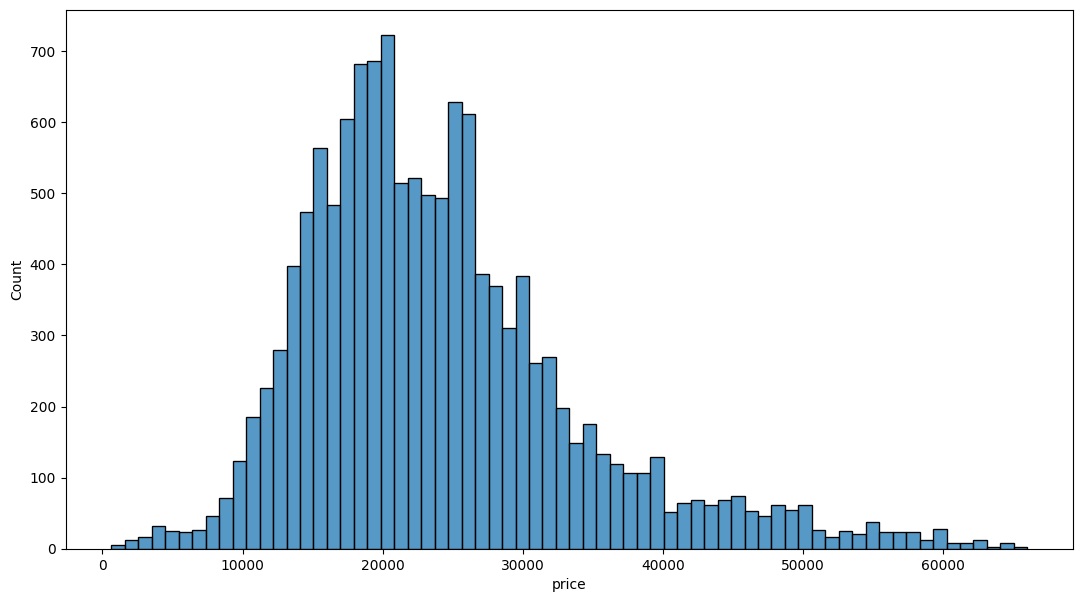

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(nnpDf["price"])
plt.show()

# Lets have a look at that the value year which is corrolated with price

In [ ]:
nnpDf.groupby('year')['price'].mean()


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

# In year 1970, mean of price is too high by compering to year order. Also this would spoil our model.

In [ ]:
nnpDf[nnpDf.year != 1970].groupby("year")["price"].mean()


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

# Better now !

In [ ]:
nnpDf.drop('transmission', axis=1, inplace=True)

In [ ]:
nnpDf.drop('fuelType', axis=1, inplace=True)

In [ ]:
nnpDf.drop('model', axis=1,inplace=True)

I droped the string values. nnpDf is looking weird  isn't it ?

In [ ]:
df = nnpDf

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


PairPlot of the whole dataframe (for comparison)

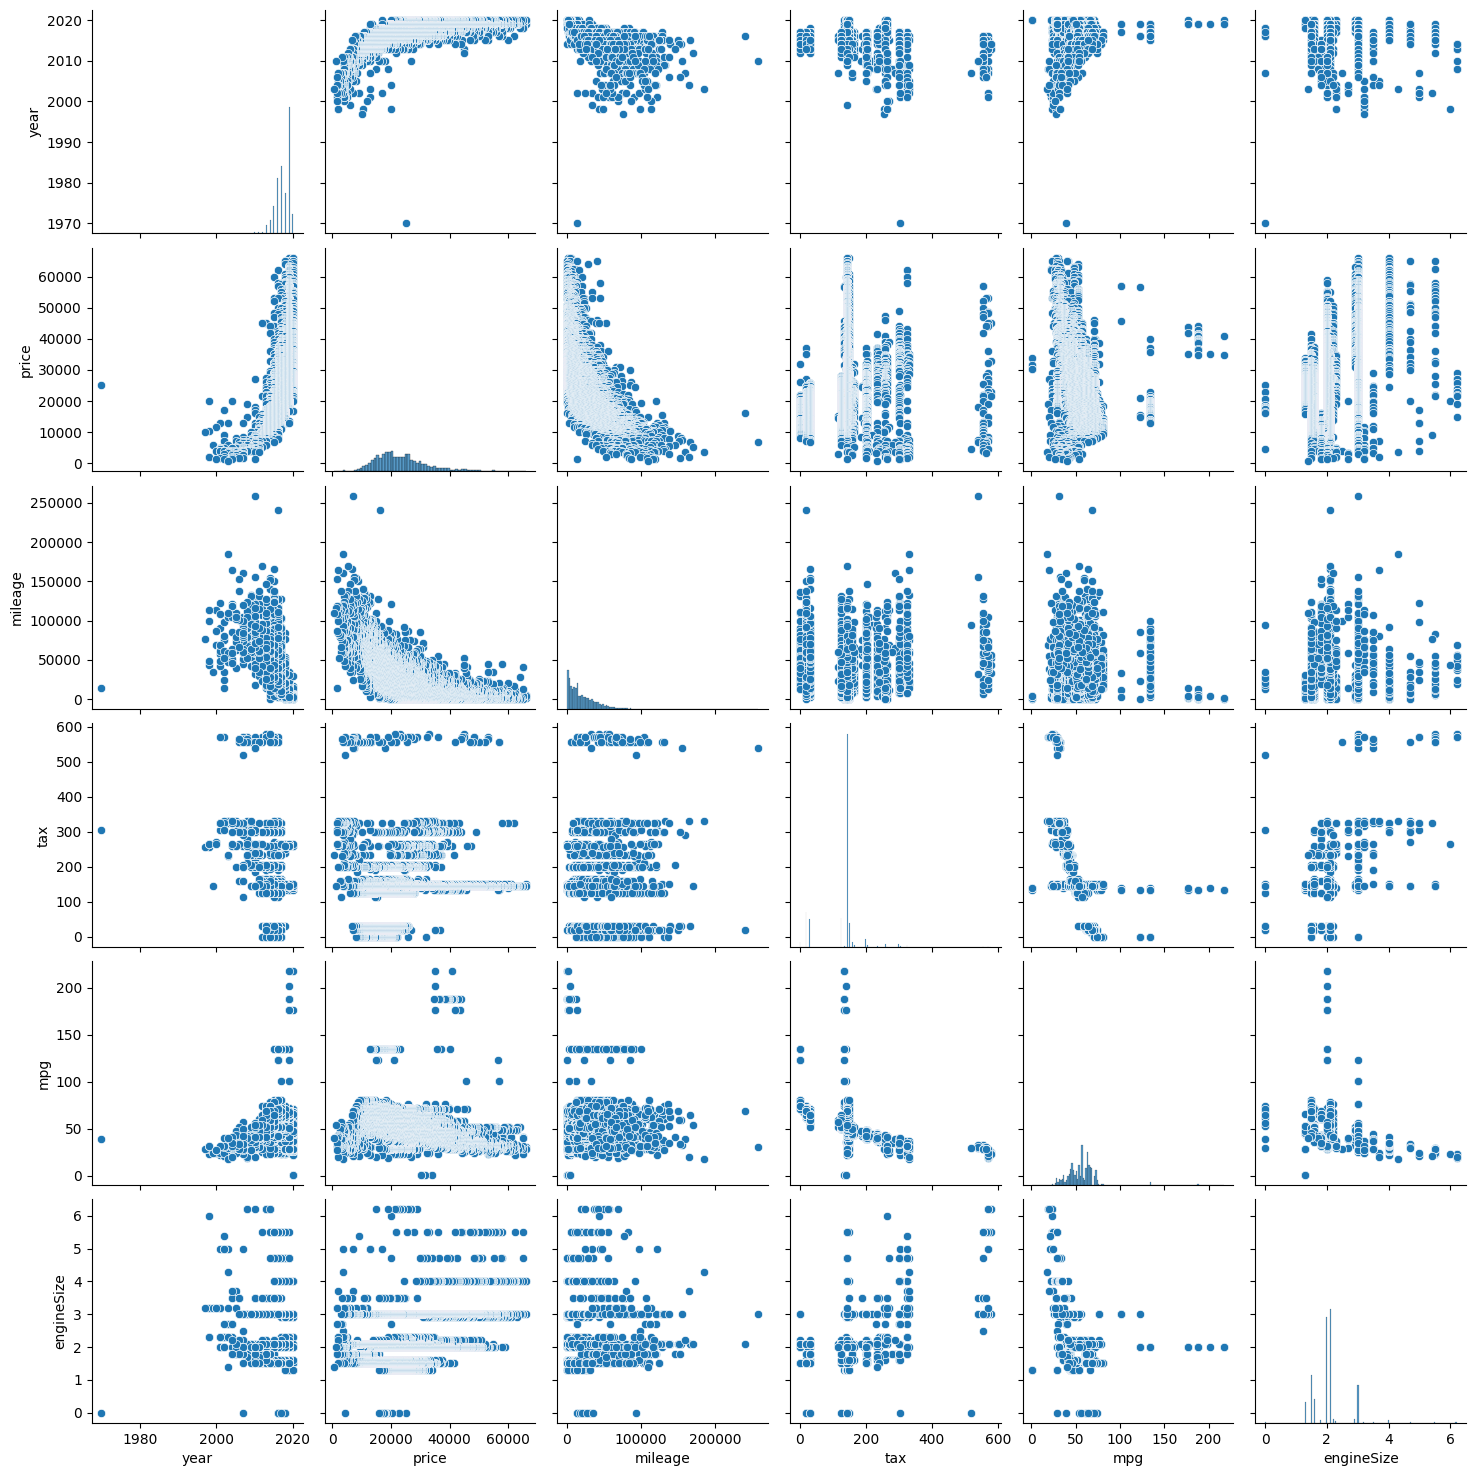

In [ ]:
sns.pairplot(df)
plt.show()

<a id = '4'></a><br>
# **Machine Learning**

# Splitting the data into Train and Test sets.

In [ ]:
y = df['price'].values
x = df.drop('price', axis=1).values

In [ ]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [ ]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

# Trying All 5 Regression Models for thier Accuracy

<a id = '5'></a><br>
### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
y_pred_lin_reg = linear_regression.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_lin_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24873.57575117 16481.40628173 21583.82921835 ...  7238.85714077
 21349.44356384 37354.78023641]


In [ ]:
print('R Square Score for Linear Regression : ', r2_score(y_test, y_pred_lin_reg))

R Square Score for Linear Regression :  0.7235429682066148


<a id = '6'></a><br>
### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x,y)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_poly, y)
y_pred_poly_reg = linear_regression2.predict(x_poly)

In [ ]:
print(f'y: {y}\nprediction: {y_pred_poly_reg}')

y: [65990 65990 65980 ...  1490  1350   650]
prediction: [47687.24087223 62241.22088156 60865.02664246 ...  6536.43823961
  4293.95681763 -2031.40459247]


In [ ]:
print('R Square Score for Polynomial Regression : ', r2_score(y, y_pred_poly_reg))

R Square Score for Polynomial Regression :  0.8312792209895457


<a id = '7'></a><br>
### SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler1 =StandardScaler()
scaled_x_train = standard_scaler1.fit_transform(x_train)
scaled_x_test = standard_scaler1.transform(x_test) # dont learn just transform
standard_scaler2=StandardScaler()
scaled_y_train = np.ravel(standard_scaler2.fit_transform(y_train.reshape(-1,1)))
scaled_y_test = np.ravel(standard_scaler2.fit_transform(y_test.reshape(-1,1)))

We scaled the variables that SVR make predictions better.

In [ ]:
from sklearn.svm import SVR
svr_regression = SVR(kernel="rbf") # other kernel types : linear, poly, rbf, sigmoid
svr_regression.fit(scaled_x_train, scaled_y_train)
y_pred_svr_reg = svr_regression.predict(scaled_x_test)

In [ ]:
print(f'y_scaled: {scaled_y_test}\nprediction: {y_pred_svr_reg}')

y_scaled: [-0.42569848 -1.18020879 -0.24880322 ... -1.38863303 -0.71278908
  2.47226209]
prediction: [-0.15622899 -0.88307372 -0.41410299 ... -1.41041052 -0.59511322
  1.0042779 ]


In [ ]:
print('R Square Score for Support Vector Regression : ', r2_score(scaled_y_test, y_pred_svr_reg))

R Square Score for Support Vector Regression :  0.8354480486104474


<a id = '8'></a><br>
### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(x_train, y_train)
y_pred_dt_reg = decision_tree_reg.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_dt_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24549. 13991. 24124. ... 11599. 17990. 44980.]


In [ ]:
print('R Square Score for Decision Tree Regression : ', r2_score(y_test, y_pred_dt_reg))

R Square Score for Decision Tree Regression :  0.8514049939401422


<a id = '9'></a><br>
### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 50, random_state= 0 ) # n_estimators = numbor of estimator tree
random_forest_reg.fit(x_train, y_train)
y_pred_rf_reg = random_forest_reg.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_rf_reg}')

y_test: [19749 12498 21449 ... 10495 16990 47599]
prediction: [24350.   14691.38 21181.42 ... 10812.78 18399.36 46937.7 ]


In [ ]:
print('R Square Score for Random Forest Regression : ', r2_score(y_test, y_pred_rf_reg))

R Square Score for Random Forest Regression :  0.904159941724667


## So, Random forest has the highest R Square Score and accuracy, so Random forest is the best Model

In [ ]:
df.head(20)

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
8083,2018,64999,41102,145,23.0,5.5
267,2019,64998,313,145,31.4,4.7
2956,2020,64980,3999,145,40.4,3.0
2274,2020,64980,3999,145,40.4,3.0
12160,2018,64950,13000,145,28.5,3.0


In [ ]:
print(random_forest_reg.predict([[2020, 1000, 140, 29.2, 4.0]]))

[60682.56]


In [ ]:
df.tail(20)

,year,price,mileage,tax,mpg,engineSize
49,2006,2880,66000,160,52.3,2.0
11263,2007,2795,79485,200,45.6,1.5
11943,2005,2690,109000,325,32.1,1.8
12765,2004,2495,104000,325,31.7,1.8
11795,2005,2490,101980,200,47.9,2.0
11906,2007,2478,81000,160,49.6,2.0
11857,2002,2140,52700,325,31.4,2.0
11383,2005,1995,105000,260,43.5,2.1
11378,2004,1995,165000,330,20.0,3.7
11808,1998,1990,113557,265,32.1,2.3


In [ ]:
print(random_forest_reg.predict([[2000, 90000, 290, 30.4, 3.0]]))

[4986.56]


<a id = '10'></a><br>
# **Model Selection**

We tried the algoritms to our data. Now the thing we must do is getting better by making eleminations by the helping of backward elemination.

## **The best model for us is Random forest .**

In [ ]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [ ]:
import statsmodels.api as sm
x = np.append(arr=np.ones((12988,1)).astype(int), values = x, axis = 1)
x_opt = x[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     6492.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:14:23   Log-Likelihood:            -1.2974e+05
No. Observations:               12988   AIC:                         2.595e+05
Df Residuals:                   12982   BIC:                         2.595e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.08e+06   6.32e+04    -64.550      0.000    -4.2e+06   -3.96e+06
x1          2030.3729     31.288     64.892      0.000    1969.043    2091.703
x2            -0.1276      0.003    -38.269      0.000      -0.134      -0.121
x3            -3.1236      0.864     -3.616      0.000      -4.817      -1.430
x4          -125.7980      3.688    -34.106      0.000    -133.028    -118.568
x5          8964.5823     95.973     93.408      0.000    8776.462    9152.703
==============================================================================
Omnibus:                     6602.150   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225323.544
Skew:                           1.817   Prob(JB):                         0.00
Kurtosis:                      23.079   Cond. No.                     4.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **As you see in P>|t| there is no need to make elemination.**

<a id = '10'></a><br>
# **Conclusion**

As a conclusion, we checked, prapered and visualized the data first. Then, we tried the models for the data. With respect to R squere score we choose best model. Finally, elimation of columns that spoil data, We cant make it better further because P>|t|. Thank you

Project completed by:
**Jinsar Ahmed 20SW116 (GL)**
**Abdul Rafay  20SW064**
**M.Taha       20SW102**  